In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from environment import Environment, DirectedTree, DEFAULT, CONSTITUENT
from prouter import Router
from sampler import Sampler, strategies
import logging

In [56]:
def preparation_env():
    print(f"Preparing environment")
    env = Environment()
    print(f"Reading swmm-outfile")
    #env.read_swmmoutfile(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.out")
    env.read_swmmoutfile(r"demo_swmm_out.out")
    print(f"Preparing graph")
    #graph = DirectedTree.from_swmm(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp.inp")
    graph = DirectedTree.from_swmm(r"demo_swmm-inp.inp")
    #node_data = pd.read_csv(r"C:\Users\albert/Documents/SWMMpulse/HS_calib_120_simp/pop_node_data.csv")
    node_data = pd.read_csv(r"pop_node_data.csv")
    node_data = node_data.set_index("NAME").to_dict(orient="index")
    graph.add_nodevalues(node_data)
    env.add_graph(graph)
    print(f"finished preparing environment")
    return env

In [49]:
#env.information["groups"]
env.information["constituents"]

{'Fecal-Matter': {'name': 'Fecal-Matter',
  'groups': ['infected', 'healthy'],
  'specific_load': 200,
  'unit': 'g',
  'decay_rate': 0.0,
  'fractions': array([1.]),
  'skewedness': array([[1, 1]])},
 'Cov-RNA': {'name': 'Cov-RNA',
  'specific_load': 1000,
  'unit': '#',
  'decay_rate': 0.114,
  'groups': ['infected'],
  'fractions': array([0.5, 0.5]),
  'skewedness': array([[1, 1],
         [1, 7]])}}

In [57]:
env = preparation_env()
router = Router(loglvl="CRITICAL")

router.add_environment(env)
packets = router.environment.get_packets()

routetable = router.route(packets=packets)

processed = router.postprocess(routetable, packets, env.information["constituents"].get(CONSTITUENT.COV))

2022-04-09 14:46:56,763 Environment DEBUG  - pattern standardized
2022-04-09 14:46:56,771 Environment DEBUG  - pattern standardized
2022-04-09 14:46:56,772 Environment INFO  - Environment instance created
2022-04-09 14:46:56,773 Environment INFO  - Reading swmm-out-file to read flows


Preparing environment
Reading swmm-outfile


2022-04-09 14:46:58,853 Environment INFO  - Swmm-out-file read
2022-04-09 14:46:58,879 Environment DEBUG  - Graph of type <class 'environment.DirectedTree'> added
2022-04-09 14:46:58,889 Environment INFO  - Generating packets


Preparing graph
finished preparing environment


2022-04-09 14:47:00,443 Environment INFO  - 58913 packets generated
2022-04-09 14:47:00,448 Router INFO  - Routing packets
2022-04-09 14:47:03,696 Router INFO  - 511 packets routed
2022-04-09 14:47:03,737 Router INFO  - Postprocessing node MH4376405120 with flows from link MH327-088-1.1.
Constituent rounted: Cov-RNA
In groups: ['infected']
Preparing arrays...
2022-04-09 14:47:03,779 Router INFO  - arrays created in 0.041922807693481445 seconds
Calculating timeseries...
2022-04-09 14:47:03,804 Router INFO  - timeseries calculated in 0.024936199188232422 seconds
Aggregating timeseries...
2022-04-09 14:47:03,975 Router INFO  - timeseries aggregated in 0.1695089340209961 seconds



<AxesSubplot:>

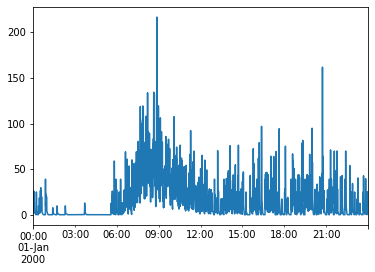

In [27]:
df = pd.DataFrame(processed, index=pd.date_range("2000-01-01", freq="10S", periods=8640))
df.sum(axis=1).plot()

In [13]:
sampler = Sampler()
#df.sum(axis=1)
sampler.sample(df_timeseries=pd.DataFrame(df.sum(axis=1)), strategy=strategies["A"])

0    14.842084
Name: concentration, dtype: float64

In [18]:
strategies

{'A': {'kind': 'time',
  'samplingfreq': '1H',
  'samplingduration': 60,
  'volume': 250},
 'B': {'kind': 'time',
  'samplingfreq': '0.3333333333333333H',
  'samplingduration': 60,
  'volume': 250},
 'C': {'kind': 'flow',
  'samplingfreq': '1H',
  'samplingduration': 60,
  'volume': 200},
 'D': {'kind': 'flow',
  'samplingfreq': '0.3333333333333333H',
  'samplingduration': 60,
  'volume': 200},
 'E': {'kind': 'volume',
  'samplecount': 24,
  'samplingduration': 60,
  'volume': 50},
 'F': {'kind': 'volume',
  'samplecount': 72,
  'samplingduration': 60,
  'volume': 250},
 'G': {'kind': 'grab',
  'samplingtime': datetime.time(9, 0),
  'samplingduration': 120,
  'volume': 1000},
 'H': {'kind': 'grab',
  'samplingtime': datetime.time(12, 0),
  'samplingduration': 120,
  'volume': 1000}}

In [17]:
import datetime as dt
dt.timedelta(days=1) / pd.to_timedelta("4H")

6.0

In [59]:
import logging
logging.basicConfig(level=logging.CRITICAL, format='%(message)s')
logger = logging.getLogger("penis")
logger.setLevel(logging.CRITICAL)
logger.info("info")
logging.info("info")
logging.debug("debug")
logger.debug("debug")
logger.warning("warning")

2022-04-09 14:48:44,691 root INFO  - info
2022-04-09 14:48:44,694 root DEBUG  - debug
